In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage.measurements import center_of_mass as cm
from scipy.signal import savgol_filter as sf
import cv2
import os

In [12]:
def distanzaMedia(immagine,media):
    Min=immagine.min()
    d=0
    immagine=immagine-Min
    for i in range(len(immagine)):
        for j in range(len(immagine[0])):
            d+=np.sqrt(immagine[i][j]*((media[1]-i)**2+(media[0]-j)**2))
    return d/immagine.sum()

def wa(y, dy):
    """Weighted average of a list of measurement.
    """
    S = Sy = 0.
    for yi, dyi in zip(y, dy):
        wi = (1./dyi)**2.
        S += wi
        Sy += wi*yi
    q = Sy/S
    dq = (1./S)**0.5
    return q, dq

lung=4325

33.85439405630175


<ErrorbarContainer object of 3 artists>

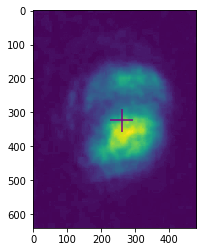

In [8]:
#questo significa che io volgio solo il canale 0, cioè il rosso
img=mpimg.imread('dati/fotogrammi/500.jpg')[:,:,0]
cm1=cm(img)
plt.imshow(img)
#plt.plot(cm1[0],cm1[1],'o',color='black')
d=distanzaMedia(img,cm1)
print(d)
plt.errorbar(cm1[1],cm1[0],yerr=d,xerr=d,color='purple')

# Centro di massa fotogrammi
Questo pezzo di codice scrive su un file chiamato centro_di_massa.txt la posizione fotogramma per fotogramma del centro di massa

Questo codice è pesante Non eseguirlo!

In [50]:
#non eseguire questo codice!

f=open('dati/centro_di_massa.txt','a')
for i in range(lung):
    img=mpimg.imread('dati/fotogrammi/'+str(i)+'.jpg')[:,:,0]
    cm1=cm(img)
    print(cm1[0],'\t',cm1[1],file=f)
f.close()

# Distanza media fotogrammi
Questo pezzo di codice scrive su un file chiamato dist_media.txt la distanza media dal centro di massa della distribuzione di luce

Questo codice è MOLTO pesante Non eseguirlo!

comunque fa anche abbastanza cagare il risultato

In [7]:
f=open('dati/distanza_media.txt','w')
cm1=np.transpose(np.genfromtxt('dati/centro_di_massa.txt',unpack='True'))
for i in range(len(cm1)):
    img=mpimg.imread('dati/fotogrammi/'+str(i)+'.jpg')[:,:,0]
    d=distanzaMedia(img,cm1[i])
    print(d,file=f)
    print(i)
    plt.imshow(img)
    plt.axis('off')
    plt.errorbar(cm1[i][1],cm1[i][0],yerr=d,xerr=d,color='purple')
    plt.savefig('immagini/video/'+str(i)+'.png')
    plt.close()
f.close()

0
1
2
3
4


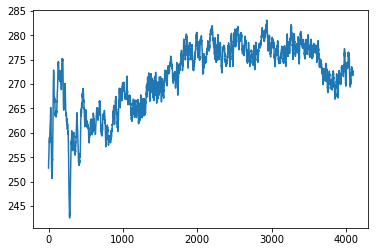

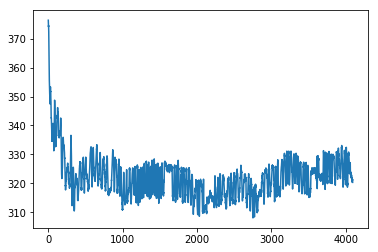

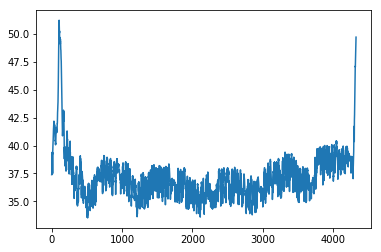

In [7]:
oscillazzioni=110

taglio1=int(5*lung/(120+49))
taglio2=int((120+45)*lung/(120+49))
cmx,cmy=np.genfromtxt('dati/centro_di_massa.txt',unpack='True')
d=np.genfromtxt('dati/distanza_media.txt',unpack='True')
cmx,cmy=cmx[taglio1:taglio2],cmy[taglio1:taglio2]
iniz=1500
plt.plot(cmy)
#plt.xlim(iniz,iniz+500)
plt.show()
plt.plot(cmx)
#plt.xlim(iniz,iniz+500)
plt.show()
plt.plot(d)

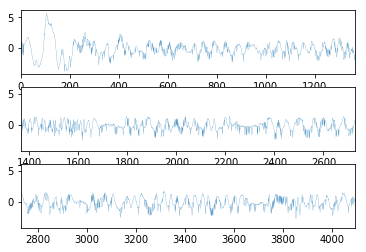

In [9]:
plt.close()
a=3
for i in range(a):
    plt.subplot(311+i)
    #plt.plot(cmx-sf(cmx,501,6),linewidth=0.2)
    #plt.plot(cmy-sf(cmy,501,6),linewidth=0.2)
    plt.plot(d-sf(d,501,6),linewidth=0.2)
    plt.xlim(len(cmx)*i/a,len(cmx)*(i+1)/a)

plt.savefig('distanza-media.eps',format='eps')

# Conteggio numero picchi

Giovanni dal video ne ha contati 110

io (sacco) ne ho contati 114 dal grafico

In [14]:
#Questo pezzo di codice è servito a rinominare i files delle imamgini
path='immagini/video/'
for filename in os.listdir(path):
    os.rename(path+filename,path+'0'*(8-len(filename))+filename)

In [47]:
immagini=[img for img in os.listdir(path)]
frame=cv2.imread(path+immagini[1])
height, width, layers = frame.shape
video = cv2.VideoWriter('video30.avi', 0, 30, (width,height))
for image in immagini:
    video.write(cv2.imread(os.path.join(path, image)))
    
cv2.destroyAllWindows()
video.release()

# Analisi che andava fatta

$n\lambda=2k\Delta C$ quindi $k=\frac{n\lambda}{2\Delta C}$

In [3]:
import menzalib as mz

In [18]:
Lambda=632.8e-9
n=[103]
dn=[1]
C=[185e-6]
dC=[5e-6]
kt=[]
dkt=[]
for i in range(len(n)):
    kt.append(n[i]*Lambda/(2*C[i]))
    dkt.append(mz.drapp(n[i],dn[i],C[i],dC[i])*Lambda/2)
k,dk=wa(kt,dkt)
    
print(mz.ne_tex(k,dk))

$0.176$ $\pm$ $0.005$


In [55]:
Mercurio=[]
dMercurio=[]
n=[35,45,50]
dn=[3,3,3]
C=[50e-6,60e-6,70e-6]
dC=[10e-6,10e-6,10e-6]

def mercurio(n,k,C):
    return 2*k*C/n

for i in range(len(n)):
    Mercurio.append(mercurio(n[i],k,C[i]))
    #dMercurio.append(mz.dy(mercurio,[n[i],k,C[i]],[0,dk,dC[i]]))
    temp=k*C[i]
    dtemp=mz.dprod(k,dk,C[i],dC[i])
    dMercurio.append(mz.drapp(temp,dtemp,n[i],dn[i])*2)
#print(mz.ne_tex(*wa(Mercurio,dMercurio)))
print(Mercurio,dMercurio)


[5.033081081081082e-07, 4.697542342342343e-07, 4.93241945945946e-07] [1.1046627930595073e-07, 8.539576679174375e-08, 7.772729858619999e-08]
